<a href="https://colab.research.google.com/github/Subhashnara/Neural_networks/blob/main/Quiz3_CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 3(100 points total)
The deliverable of this quiz is this jupyter-notebook completed with your solution.

If not necessary, you are <b>not allowed</b> to change the code that are provided, you are being assessed based on:
  - 1. Code execution - 25%
  - 2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 25%
  - 3. Proper usage of the techniques seen in class - 25%
  - 4. Quality and correcteness of the results - 25%

  
      
## Importing Python Libraries

In [36]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf


## Load dataset, explore it  and split it into train, validation and test sets

- [Load CIFAR-10 Keras](https://www.cs.toronto.edu/~kriz/cifar.html)

In [35]:
# Loading the data using the Keras function
(X_dev, Y_dev), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data() # The data comes already split
                                                                        # in dev and test sets
print("Development set")
print("Images: ",X_dev.shape)
print("Labels shape:",Y_dev.shape)
print("\nNumber of classes:",np.unique(Y_dev).size)
print("\nClasses:",np.unique(Y_dev))
print("\nTest set")
print("Images: ",X_test.shape)
print("Labels shape: ",Y_test.shape)

Development set
Images:  (50000, 32, 32, 3)
Labels shape: (50000, 1)

Number of classes: 10

Classes: [0 1 2 3 4 5 6 7 8 9]

Test set
Images:  (10000, 32, 32, 3)
Labels shape:  (10000, 1)


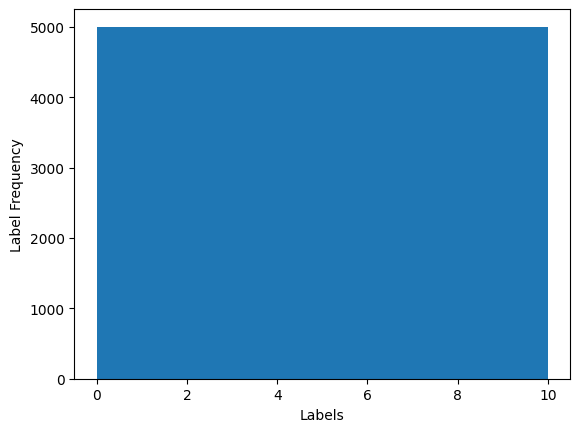

In [34]:
plt.figure()
plt.hist(Y_dev, bins = range(11))
plt.xlabel("Labels")
plt.ylabel("Label Frequency")
plt.show()

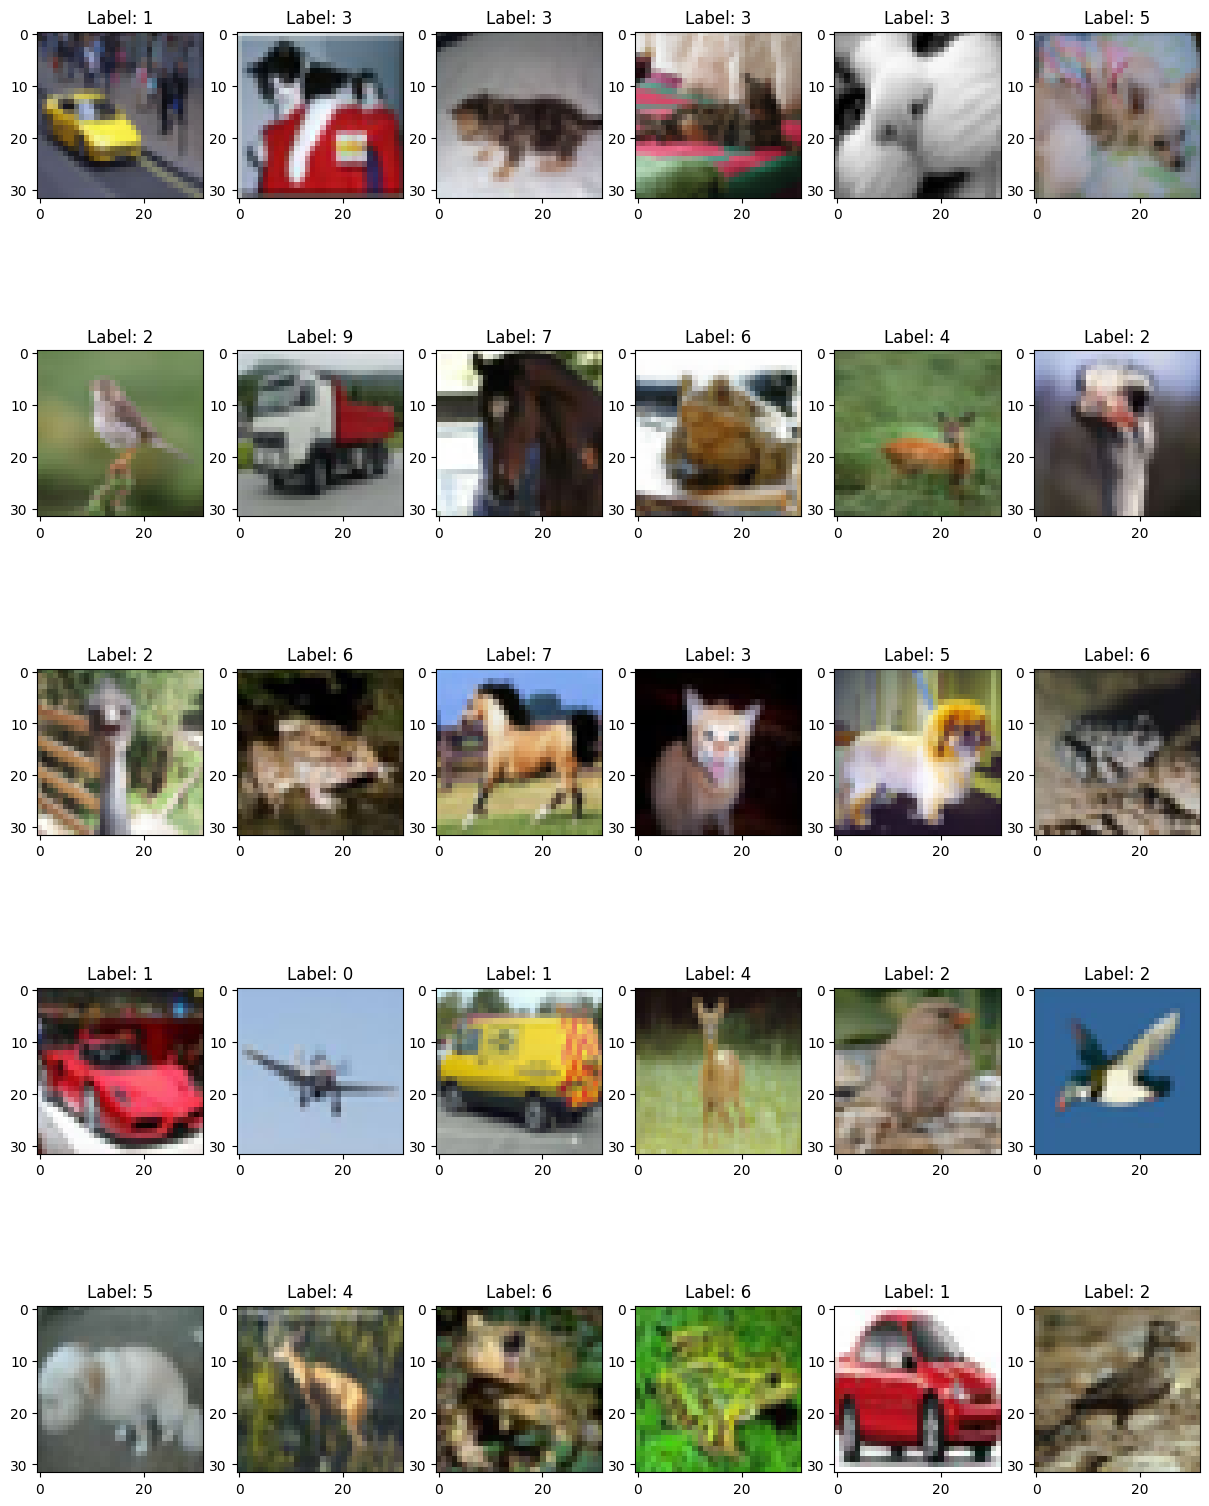

In [33]:
# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(X_dev.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (15,20)) #I made the figure size from 32,32 to 15,20 in order to make the pictures understandable
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj], cmap = "viridis")
    plt.title("Label: %d" %Y_dev[jj][0])
plt.show()

In [32]:
#The number of classes across samples looks balanced
# Let's shuffle the samples and split them

indexes = np.arange(X_dev.shape[0], dtype = int)
np.random.shuffle(indexes)
X_dev = X_dev[indexes]
Y_dev = Y_dev[indexes]

nsplit = int(0.75*X_dev.shape[0]) # Train/validation split

# Train and validation split

# Include your solution below
X_train = X_dev[:nsplit]
Y_train = Y_dev[:nsplit]        # DEVELOPMENT SET = TRAIN SET + VALIDATION SET
X_val = X_dev[nsplit:]
Y_val = Y_dev[nsplit:]

print("\nTrain set")
print("Images: ",X_train.shape)
print("Labels shape: ",Y_train.shape)
print("\nValidation set")
print("Images: ",X_val.shape)
print("Labels shape: ",Y_val.shape)


Train set
Images:  (37500, 32, 32, 3)
Labels shape:  (37500, 1)

Validation set
Images:  (12500, 32, 32, 3)
Labels shape:  (12500, 1)


In [31]:
print(X_train.min(),X_train.max(),X_train.mean(),X_train.std())
print(X_val.min(),X_val.max(),X_val.mean(),X_val.std())

0.0 0.00392156862745098 0.0018553351615564482 0.0009865504353457732
0.0 0.00392156862745098 0.0018592964837242057 0.0009865219455427751


## 2. Data Scaling

In [30]:
norm_type = 0 # 0 -> min-max; 1-> standardization

if norm_type == 0:
    X_train = X_train/255
    X_val = X_val/255
    X_test = X_test/255
elif norm_type == 1:
    train_mean, train_std = X_train.mean(),X_train.std()
    X_train = (X_train - train_mean)/train_std
    X_val = (X_val - train_mean)/train_std
    X_test = (X_test - train_mean)/train_std
else:
    pass

## 3. One hot encoding

In [29]:
# Include your solution below
Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
Y_test_oh = tf.keras.utils.to_categorical(Y_test)

print("Labels:")
print(Y_train[:5])
print()
print("One hot encoded labels:")
print(Y_train_oh[:5])

Labels:
[[9]
 [3]
 [3]
 [8]
 [8]]

One hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


## 4. Define your model, cost function, optimizer, learning rate

In [28]:
# you must create a convolutional neural network model with 8 layers (1 input layer, 3 convolutional layers,
# 2 dropout layers, 1 max pooling layer, 1 output layer)

def my_model(ishape = (32,32,3), k = 10, lr = 1e-4):
    # Include your solution below
    model_input = tf.keras.layers.Input(shape = ishape) #input layer
    layer_1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(model_input)  #first convolutional layer

    layer_2 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(layer_1)     #second convolutional layer

    layer_2_drop = tf.keras.layers.Dropout(0.25)(layer_2)                                           #first dropout layer

    layer_3 = tf.keras.layers.MaxPool2D((2,2))(layer_2_drop)                                        #max pooling layer

    layer_4 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(layer_3)     #third convolutional layer

    layer_4_drop = tf.keras.layers.Dropout(0.25)(layer_4)                                           #second dropout layer

    flat = tf.keras.layers.Flatten()(layer_4_drop)                                                  #Flatten layer

    out = tf.keras.layers.Dense(k, activation = 'softmax')(flat)                                    #output layer

    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy"])
    return model

In [16]:
model = my_model()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                             

## 5. Define your callbacks (save your model, patience, etc.)

- [Keras callbacks](https://keras.io/api/callbacks/)

In [27]:
model_name = "best_model_cifar10_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 6. Train your model

In [17]:
my_epochs = 10
my_batch_size = 32

model.fit(X_train, Y_train_oh, batch_size = my_batch_size, epochs = my_epochs, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(X_val,Y_val_oh))

Epoch 1/10
1172/1172 [==============================] - 130s 110ms/step - loss: 1.9032 - accuracy: 0.3185 - val_loss: 1.7076 - val_accuracy: 0.4186 - lr: 5.0000e-05
Epoch 2/10
1172/1172 [==============================] - 130s 111ms/step - loss: 1.5950 - accuracy: 0.4333 - val_loss: 1.5717 - val_accuracy: 0.4572 - lr: 5.0000e-05
Epoch 3/10
1172/1172 [==============================] - 133s 113ms/step - loss: 1.5017 - accuracy: 0.4665 - val_loss: 1.5030 - val_accuracy: 0.4866 - lr: 5.0000e-05
Epoch 4/10
1172/1172 [==============================] - 130s 111ms/step - loss: 1.4330 - accuracy: 0.4902 - val_loss: 1.4313 - val_accuracy: 0.5069 - lr: 5.0000e-05
Epoch 5/10
1172/1172 [==============================] - 130s 111ms/step - loss: 1.3700 - accuracy: 0.5131 - val_loss: 1.4054 - val_accuracy: 0.5189 - lr: 5.0000e-05
Epoch 6/10
1172/1172 [==============================] - 131s 111ms/step - loss: 1.3168 - accuracy: 0.5340 - val_loss: 1.3365 - val_accuracy: 0.5427 - lr: 5.0000e-05
Epoch 7/10

## 7. Test your model on the test and extract relevant metrics

In [26]:
model.load_weights(model_name)
metrics = model.evaluate(X_test,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

313/313 [==============================] - 7s 22ms/step - loss: 1.2230 - accuracy: 0.5806
Categorical cross-entropy: 1.2230148315429688
Accuracy: 0.5806000232696533


313/313 [==============================] - 8s 25ms/step
90000000


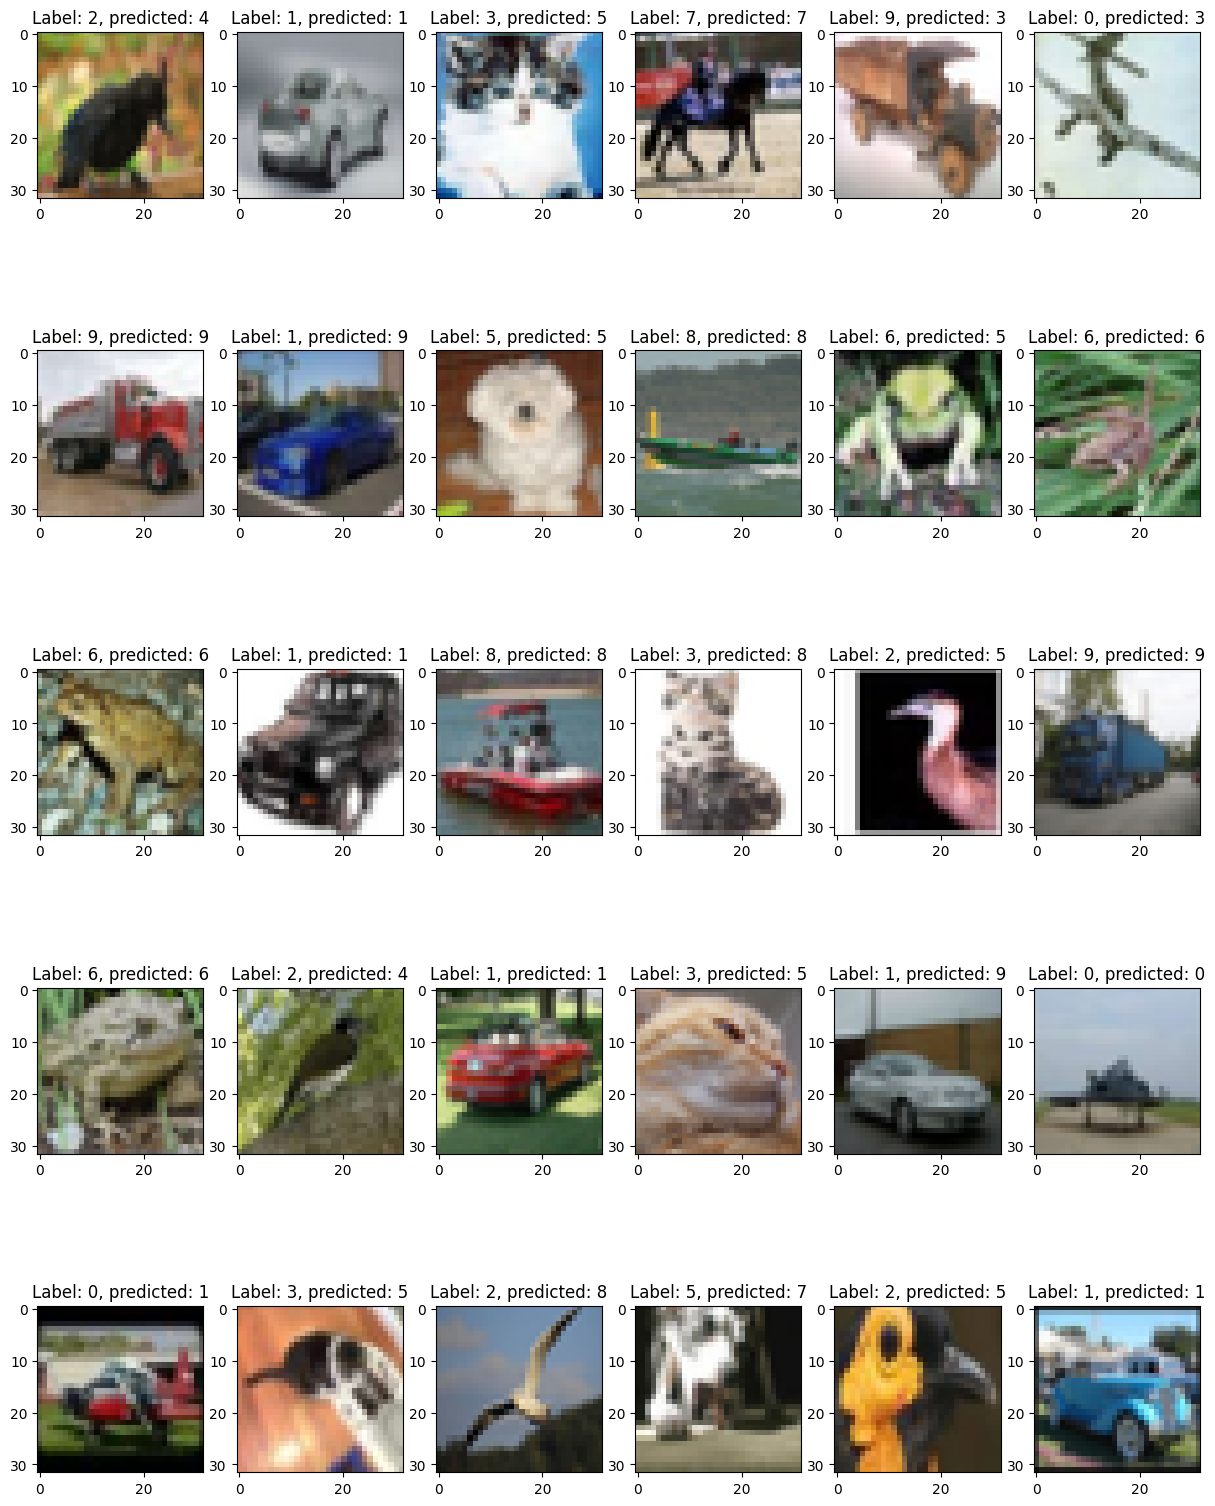

In [25]:
Ypred = model.predict(X_test).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test)[0]
print(wrong_indexes.size)

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (15,20)) #I made the figure size from 32,32 to 15,20 in order to make the pictures understandable
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_test[wrong_indexes[jj]], cmap = "viridis")
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()